# Extra Exercises

### 2. Data Augmentation `(DEPRECATED)`
> Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called `data augmentation` or `training set expansion`.

In [4]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Loads the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.ndimage import shift

In [3]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

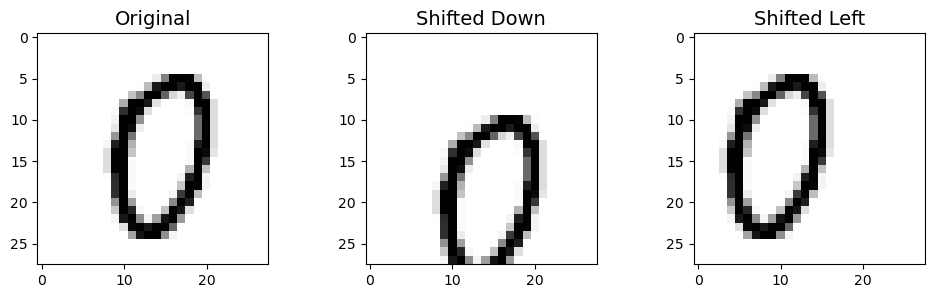

In [18]:
image = X_train[1000]
shift_image_down = shift_image(image, 0, 5)
shift_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shift_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted Left", fontsize=14)
plt.imshow(shift_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")

In [19]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [20]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{"weights": ["uniform", "distance"], "n_neighbors": [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

grid_search.fit(X_train, y_train)

# grid_search.best_params_

# Ensure the grid search is completed
if grid_search.best_params_:
    print("Best parameters found:", grid_search.best_params_)

    # Now you can create a new classifier with the best parameters and fit it
    knn_clf = KNeighborsClassifier(**grid_search.best_params_)
    knn_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 1/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 2/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 3/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 4/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 5/5] END ......n_neighbors=3, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 1/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 2/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 3/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 4/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 5/5] END .....n_neighbors=3, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 1/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 2/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 3/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 4/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 5/5] END ......n_neighbors=4, weights=uniform;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 1/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 2/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 3/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 4/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 5/5] END .....n_neighbors=4, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 1/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 2/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 3/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 4/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 249, in predict
    probabilities = self.predict_proba(X)
  File "

[CV 5/5] END ......n_neighbors=5, weights=uniform;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 1/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 2/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 3/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.1s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 4/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.2s


c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "c:\Users\markl\anaconda3\envs\1sem_ai_ml_workspace\lib\site-packages\sklearn\neighbors\_classification.py", line 264, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  F

[CV 5/5] END .....n_neighbors=5, weights=distance;, score=nan total time=   0.2s
Best parameters found: {'n_neighbors': 3, 'weights': 'uniform'}


In [30]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
from sklearn.metrics import accuracy_score

y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

AttributeError: 'NoneType' object has no attribute 'split'